# 資料預處理

In [1]:
import tensorflow as tf
import tensorflow.examples.tutorials.mnist.input_data as input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True) #自動將結果轉換成one_hot格式

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [2]:
print('train images     :', mnist.train.images.shape,
      'labels:'           , mnist.train.labels.shape)
print('validation images:', mnist.validation.images.shape,
      ' labels:'          , mnist.validation.labels.shape)
print('test images      :', mnist.test.images.shape,
      'labels:'           , mnist.test.labels.shape)

train images     : (55000, 784) labels: (55000, 10)
validation images: (5000, 784)  labels: (5000, 10)
test images      : (10000, 784) labels: (10000, 10)


## 建立模型

In [4]:
#1.0版本寫起來相當複雜...

#原始定義，要回傳output值
def layer(output_dim,input_dim,inputs, activation=None):
    W = tf.Variable(tf.random_normal([input_dim, output_dim])) #使用rand.norm，input給神經元，右邊是output給下一個神經元
    b = tf.Variable(tf.random_normal([1, output_dim])) #左邊是每個神經元的bias數字，右邊是output給下一個神經元
    XWb = tf.matmul(inputs, W) + b
    if activation is None:
        outputs = XWb
    else:
        outputs = activation(XWb) #設立activation func.
    return outputs

#進階一點，找bug，可以回傳output, W和b
def layer_debug(output_dim,input_dim,inputs, activation=None):
    W = tf.Variable(tf.random_normal([input_dim, output_dim]))
    b = tf.Variable(tf.random_normal([1, output_dim]))
    XWb = tf.matmul(inputs, W) + b
    if activation is None:
        outputs = XWb
    else:
        outputs = activation(XWb)
    return outputs,W,b


#輸入層x，data已經處理過變成1維784個值的向量
x = tf.placeholder("float32", [None, 784])

#隱藏層h1，800個神經元
h1=layer(output_dim=800,input_dim=784,
         inputs=x ,activation=tf.nn.relu)  

#輸出層，輸出成10個數字辨識結果
y_predict=layer(output_dim=10,input_dim=800,
                    inputs=h1,activation=None)


y_label = tf.placeholder("float32", [None, 10])

#定義誤差
loss_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_predict, labels=y_label))

#定義目標（誤差降低）、學習速度
optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss_function)

#定義答對，argmax函數是指輸出使output最大的x，也就是把one_hot coding的結果轉換成數字0~9
#答對就是1，錯誤就是0
correct_prediction = tf.equal(tf.argmax(y_label  , 1),
                              tf.argmax(y_predict, 1))

#定義準確度，tf.cast可以把整數結果轉為float再做平均，reduce_mean就是將維度縮成一個平均值
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float32"))


# 訓練模型

In [5]:
#設定好迷你訓練和總訓練次數
trainEpochs = 15
batchSize = 100
totalBatchs = int(mnist.train.num_examples/batchSize)

#統計使用
epoch_list=[]
loss_list=[]
accuracy_list=[]

#既時間
from time import time
startTime=time() #時間歸零
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for epoch in range(trainEpochs):
    for i in range(totalBatchs):
        batch_x, batch_y = mnist.train.next_batch(batchSize)
        sess.run(optimizer,feed_dict={x: batch_x,y_label: batch_y})
        
    loss, acc = sess.run([loss_function,accuracy],
                         feed_dict={x: mnist.validation.images, y_label: mnist.validation.labels})

    epoch_list.append(epoch)
    loss_list.append(loss)
    accuracy_list.append(acc)    
    
    print("Train Epoch:", '%02d' % (epoch+1), 
          " Loss=","{:.9f}".format(loss),
          " Accuracy=",acc,
          " Time=", time()-startTime+'s')
    
duration =time()-startTime #
print("Train Finished takes:",duration)      

Train Epoch: 01 Loss= 8.352909088  Accuracy= 0.886
Train Epoch: 02 Loss= 5.341279030  Accuracy= 0.9096
Train Epoch: 03 Loss= 4.164056301  Accuracy= 0.925
Train Epoch: 04 Loss= 3.373940229  Accuracy= 0.9344
Train Epoch: 05 Loss= 2.934799910  Accuracy= 0.94
Train Epoch: 06 Loss= 2.724165201  Accuracy= 0.9452
Train Epoch: 07 Loss= 2.536964417  Accuracy= 0.9434
Train Epoch: 08 Loss= 2.233466387  Accuracy= 0.9496
Train Epoch: 09 Loss= 2.268657207  Accuracy= 0.9496
Train Epoch: 10 Loss= 2.029934883  Accuracy= 0.9506
Train Epoch: 11 Loss= 2.062587976  Accuracy= 0.9506
Train Epoch: 12 Loss= 2.158470392  Accuracy= 0.95
Train Epoch: 13 Loss= 1.874786735  Accuracy= 0.9544
Train Epoch: 14 Loss= 1.904512167  Accuracy= 0.9564
Train Epoch: 15 Loss= 1.913780808  Accuracy= 0.954
Train Finished takes: 253.29927515983582


# 視覺化精確度

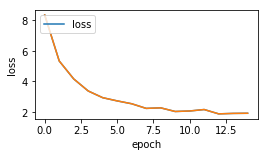

In [7]:
import matplotlib.pyplot as plt

fig = plt.gcf()
fig.set_size_inches(4,2)
plt.plot(epoch_list, loss_list, label = 'loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss'], loc='upper left')
plt.show()

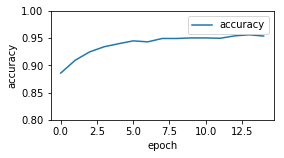

In [8]:
plt.plot(epoch_list, accuracy_list,label="accuracy" )
fig = plt.gcf()
fig.set_size_inches(4,2)
plt.ylim(0.8,1)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [9]:
print("Accuracy:", sess.run(accuracy, feed_dict={x: mnist.test.images,
                                                 y_label: mnist.test.labels}))

Accuracy: 0.9529


# 進行預測

In [11]:
prediction_result = sess.run(tf.argmax(y_predict,1),
                             feed_dict={x: mnist.test.images })

In [12]:
prediction_result[0:5]

array([7, 2, 1, 0, 4])

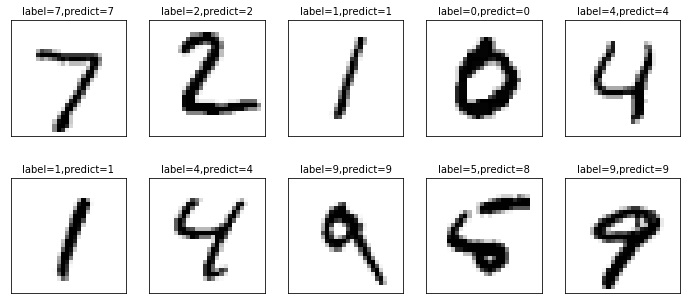

In [14]:
import matplotlib.pyplot as plt
import numpy as np
def plot_images_labels_prediction(images, labels, prediction, idx,num=10):
    
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        
        ax.imshow(np.reshape(images[idx],(28, 28)), cmap='binary')
            
        title= "label=" +str(np.argmax(labels[idx]))
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx]) 
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()
    
plot_images_labels_prediction(mnist.test.images,
                              mnist.test.labels,
                              prediction_result,0)

# 找出錯誤

In [15]:
for i in range(400):
    if prediction_result[i]!=np.argmax(mnist.test.labels[i]):
        print("i="+str(i)+
              "   label=",np.argmax(mnist.test.labels[i]),
              "predict=",prediction_result[i])

i=8   label= 5 predict= 8
i=33   label= 4 predict= 0
i=63   label= 3 predict= 2
i=81   label= 6 predict= 1
i=115   label= 4 predict= 9
i=125   label= 9 predict= 1
i=139   label= 4 predict= 8
i=149   label= 2 predict= 3
i=158   label= 3 predict= 2
i=195   label= 3 predict= 1
i=211   label= 5 predict= 8
i=245   label= 3 predict= 5
i=259   label= 6 predict= 0
i=268   label= 8 predict= 9
i=321   label= 2 predict= 7
i=339   label= 6 predict= 5
i=340   label= 5 predict= 3
i=341   label= 6 predict= 2
i=386   label= 6 predict= 5
